# FUZZY LOGIC

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

/home/leandrofdez/Escritorio/LEANDRO/4/AI/PRACTICE/.venv/lib/python3.10/site-packages/skfuzzy/control/term.py:74: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


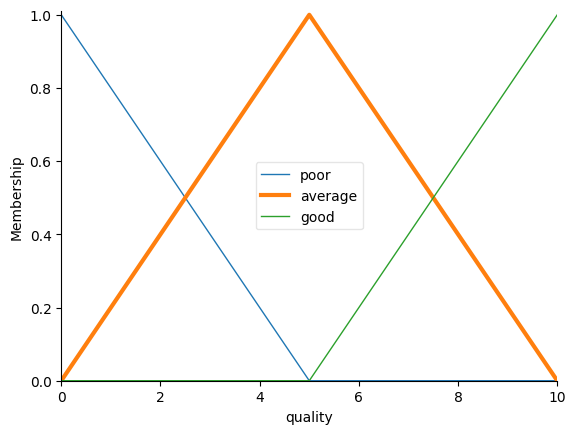

In [2]:
quality= ctrl.Antecedent(np.arange(0,11,1),'quality')
service= ctrl.Antecedent(np.arange(0,11,1),'service')
tip=     ctrl.Consequent(np.arange(0,26,1),'tip')

quality.automf(3)
service.automf(3)

tip['low']= fuzz.trimf(tip.universe,[0,0,13])
tip['medium']= fuzz.trimf(tip.universe,[0,13,25])
tip['high']= fuzz.trimf(tip.universe,[13,25,25])

quality['average'].view()

/home/leandrofdez/Escritorio/LEANDRO/4/AI/PRACTICE/.venv/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


19.847607361963192


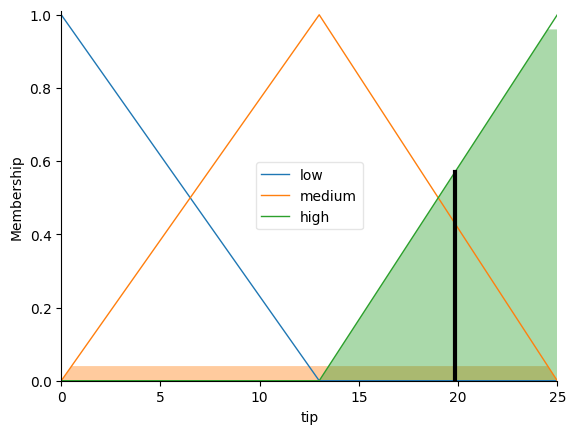

In [3]:
rule1= ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2= ctrl.Rule(service['average'], tip['medium'])
rule3= ctrl.Rule(service['good'] | quality['good'], tip['high'])

tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['quality']=6.5
tipping.input['service']=9.8

tipping.compute()

print(tipping.output['tip'])
tip.view(sim=tipping)

# Task

![](./images/fuzzy_logic_task.jpeg)

12.294117647058798


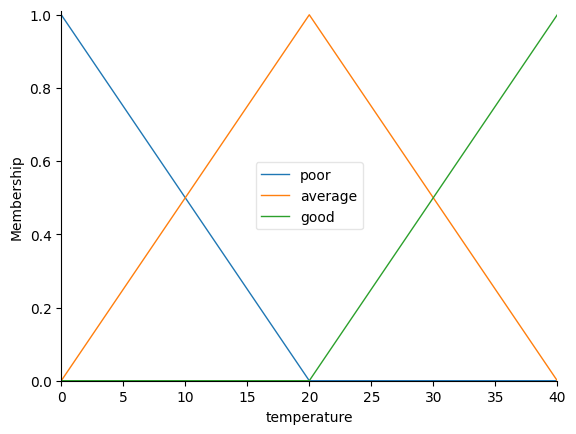

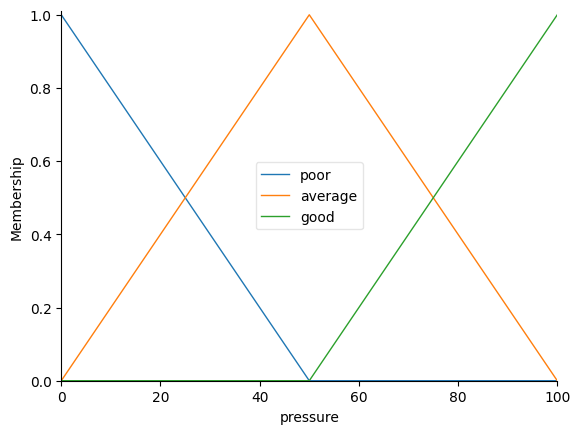

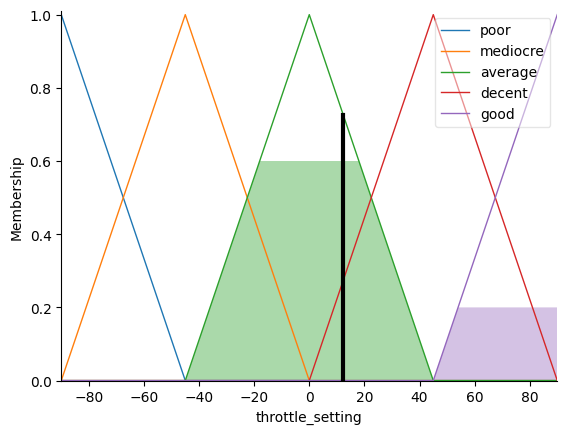

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#Input variables
temperature=      ctrl.Antecedent(np.arange(0,41,1),'temperature')
pressure=         ctrl.Antecedent(np.arange(0,101,1),'pressure')
#Ouput variables
throttle_setting= ctrl.Consequent(np.arange(-90,91,1),'throttle_setting')

#Membership functions
temperature.automf(3)
pressure.automf(3)
throttle_setting.automf(5)

#Temperature and Pressure
temperature.view()
pressure.view()

#Rules
rule1= ctrl.Rule(temperature['poor'] & pressure['poor'], throttle_setting['good'])
rule2= ctrl.Rule(temperature['poor'] & pressure['average'], throttle_setting['average'])
rule3= ctrl.Rule(temperature['average'] & pressure['poor'], throttle_setting['good'])
rule4= ctrl.Rule(temperature['average'] & pressure['average'], throttle_setting['average'])

throttle_control= ctrl.ControlSystem([rule1,rule2,rule3,rule4])
throttle= ctrl.ControlSystemSimulation(throttle_control)

#Deffuzification
throttle.input['temperature']=12
throttle.input['pressure']=40
throttle.compute()

print(throttle.output['throttle_setting'])
throttle_setting.view(sim=throttle)

### Task

1. Define the Inputs and Output:

    Altitude (meters above the runway): Define fuzzy sets for Low, Medium, and High.

    Descent Rate (rate of descent in m/s): Define fuzzy sets for Slow, Moderate, and Fast.
    
    Throttle (percentage of throttle): Define fuzzy sets for Idle, Low, Medium, High, and Full.

2. Set Up Fuzzy Rules: Create rules that adjust the throttle based on the altitude and descent rate. For example:

    If Altitude is Low and Descent Rate is Slow, then Throttle is Idle.

    If Altitude is Medium and Descent Rate is Fast, then Throttle is High.
    
    If Altitude is High and Descent Rate is Moderate, then Throttle is Medium.

3. Build and Simulate the Fuzzy Control System: Implement the fuzzy control system in Python and simulate a few test cases to see how the throttle responds under different conditions.

4. Expected Output: Based on the fuzzy rules, the system should provide a Throttle percentage recommendation for the airplane’s descent.

44.999999999999986


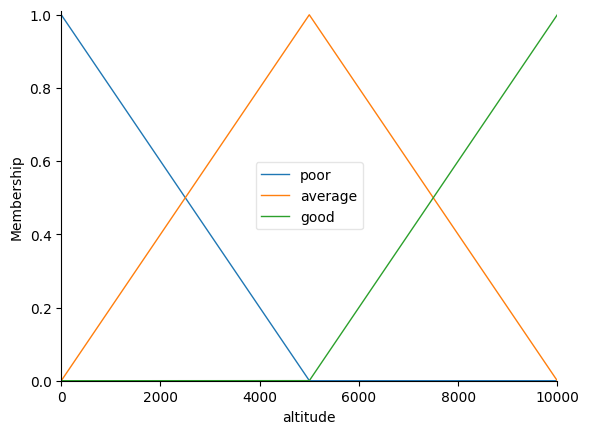

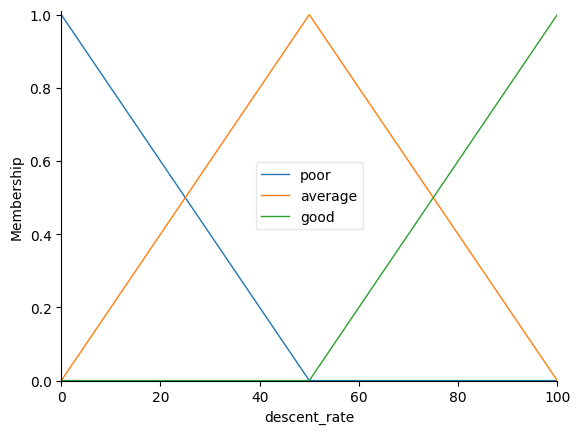

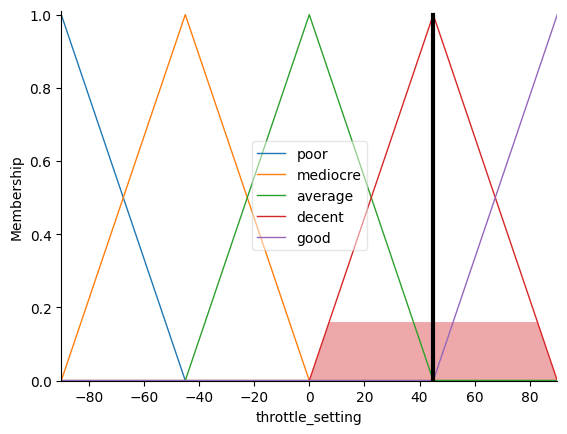

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#Input variables
altitude=         ctrl.Antecedent(np.arange(0,10001,1),'altitude')
descent_rate=     ctrl.Antecedent(np.arange(0,101,1),'descent_rate')
#Ouput variables
throttle_setting= ctrl.Consequent(np.arange(-90,91,1),'throttle_setting')

#Membership functions
altitude.automf(3)
descent_rate.automf(3)
throttle_setting.automf(5)

#Altitude and descent rate
altitude.view()
descent_rate.view()

#Rules
rule1= ctrl.Rule(altitude['poor'] & descent_rate['poor'], throttle_setting['poor'])
rule2= ctrl.Rule(altitude['average'] & descent_rate['good'], throttle_setting['decent'])
rule3= ctrl.Rule(altitude['good'] & descent_rate['average'], throttle_setting['average'])

throttle_control= ctrl.ControlSystem([rule1,rule2,rule3])
throttle= ctrl.ControlSystemSimulation(throttle_control)

#Deffuzification
throttle.input['altitude']=800
throttle.input['descent_rate']=90
throttle.compute()

print(throttle.output['throttle_setting'])
throttle_setting.view(sim=throttle)